In [1]:
import os
import pandas as pd
import numpy as np
import anndata
import time
import matplotlib.pyplot as plt
import json
import requests

In [2]:
version = '20231030'
download_base = '../../abc_download_root'

use_local_cache = True
manifest_path = 'releases/%s/manifest.json' % version

if not use_local_cache :
    url = 'https://allen-brain-cell-atlas.s3-us-west-2.amazonaws.com/' + manifest_path
    manifest = json.loads(requests.get(url).text)
else :
    file = os.path.join(download_base,manifest_path)
    with open(file,'rb') as f:
        manifest = json.load(f)
    
metadata = manifest['file_listing']['SEAAD-MERFISH']['metadata']

In [3]:
view_directory = os.path.join( download_base, 
                               manifest['directory_listing']['SEAAD-MERFISH']['directories']['metadata']['relative_path'], 
                              'views')
cache_views = True
if cache_views :
    os.makedirs( view_directory, exist_ok=True )

In [4]:
rpath = metadata['cell_metadata']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
cell = pd.read_csv(file, dtype={'cell_label':str})
cell.set_index('cell_label',inplace=True)
print("Number of cells = ", len(cell))
cell.head(5)

Number of cells =  1321191


region_of_interest_acronym donor_label  \
cell_label                                          
896178                            MTG  H21.33.001   
222944                            MTG  H20.33.004   
888681                            MTG  H21.33.001   
1080706                           MTG  H20.33.040   
1310397                           MTG  H20.33.044   

                           brain_section_label  depth_from_pia  \
cell_label                                                       
896178      H20.33.001.CX28.MTG.02.007.1.02.02     1886.388173   
222944      H20.33.004.Cx26.MTG.02.007.1.02.03       -1.000000   
888681      H20.33.001.CX28.MTG.02.007.1.02.02       -1.000000   
1080706     H20.33.040.Cx25.MTG.02.007.1.01.03       -1.000000   
1310397     H20.33.044.Cx26.MTG.02.007.1.01.04     2979.073541   

            used_in_analysis cluster_alias  supertype_confidence            x  \
cell_label                                                                      
896178                     1     L2/3 IT_3              0.399292   232.660355   
222944                     0       Oligo_2              0.440429  3304.948296   
888681                     0    Pericyte_1              0.352897  -899.627046   
1080706                    0       L5 IT_1              0.330605  5306.712986   
1310397                    1      Monocyte              0.361638  2158.009057   

                      y        grid_x        grid_y      mosaic_x  \
cell_label                                                          
896178      1822.528791    232.660355   1822.528791    632.660355   
222944      4433.918525  19860.486380  38493.046459  34518.692072   
888681      2012.395008   -899.627046   2012.395008   -499.627046   
1080706     2809.825040   9445.597507  23245.301799   8852.507542   
1310397     2979.939983  35269.085226  16603.591157  38287.964390   

                mosaic_y  
cell_label                
896178       1822.528791  
222944      22789.518106  
888681       2012.395008  
1080706     16183.755272  
1310397      9292.044629

In [5]:
def print_column_info(df) :
    
    for c in df.columns :
        grouped = df[[c]].groupby(c).count()
        members = ''
        if len(grouped) < 30 :
            members = str(list(grouped.index))
        print("Number of unique %s = %d %s" % (c,len(grouped),members))
        

In [6]:
print_column_info(cell)

Number of unique region_of_interest_acronym = 1 ['MTG']
Number of unique donor_label = 24 ['H20.33.001', 'H20.33.004', 'H20.33.012', 'H20.33.025', 'H20.33.035', 'H20.33.040', 'H20.33.044', 'H21.33.001', 'H21.33.005', 'H21.33.006', 'H21.33.011', 'H21.33.012', 'H21.33.013', 'H21.33.014', 'H21.33.015', 'H21.33.016', 'H21.33.019', 'H21.33.021', 'H21.33.022', 'H21.33.023', 'H21.33.025', 'H21.33.028', 'H21.33.032', 'H21.33.038']
Number of unique brain_section_label = 59 
Number of unique depth_from_pia = 301979 
Number of unique used_in_analysis = 2 [0, 1]
Number of unique cluster_alias = 137 
Number of unique supertype_confidence = 1320996 
Number of unique x = 1321133 
Number of unique y = 1321133 
Number of unique grid_x = 1321141 
Number of unique grid_y = 1321139 
Number of unique mosaic_x = 1321188 
Number of unique mosaic_y = 1321137 


In [7]:
donor_metadata = manifest['file_listing']['SEAAD-10X']['metadata']
rpath = donor_metadata['donor_metadata']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
donor = pd.read_csv(file)
donor.set_index('donor_label',inplace=True)
color_cols = [x for x in donor.columns if 'color' in x ]
donor[color_cols] = donor[color_cols].fillna(value='#f9f9f9')

In [8]:
donor = donor.sort_values('pseudo_progression_score')
donor[pd.notna(donor['pseudo_progression_score'])]

donor_sex donor_gender age_at_death  pseudo_progression_score  \
donor_label                                                                 
H21.33.001       Male         Male           80                  0.149616   
H21.33.011     Female       Female           83                  0.170619   
H21.33.037     Female       Female           88                  0.180319   
H21.33.038     Female       Female           84                  0.182370   
H20.33.035     Female       Female          90+                  0.204485   
...               ...          ...          ...                       ...   
H21.33.009     Female       Female           65                  0.911019   
H21.33.020       Male         Male           82                  0.911077   
H20.33.045     Female       Female           77                  0.922354   
H21.33.045     Female       Female          90+                  0.924065   
H20.33.020       Male         Male           81                  0.928513   

             years_of_education apoe4_status cognitive_status thal_phase  \
donor_label                                                                
H21.33.001                 21.0            N         Dementia     Thal 2   
H21.33.011                 17.0            N      No dementia     Thal 0   
H21.33.037                 18.0            N      No dementia     Thal 2   
H21.33.038                 15.0            N      No dementia     Thal 1   
H20.33.035                 16.0            N      No dementia     Thal 0   
...                         ...          ...              ...        ...   
H21.33.009                 16.0            Y         Dementia     Thal 5   
H21.33.020                 21.0            N         Dementia     Thal 4   
H20.33.045                 18.0            Y         Dementia     Thal 5   
H21.33.045                 12.0            Y         Dementia     Thal 4   
H20.33.020                 12.0            Y         Dementia     Thal 5   

            braak_stage cerad_score  ... braak_stage_order  braak_stage_color  \
donor_label                          ...                                        
H21.33.001    Braak III      Absent  ...               2.0            #1fa187   
H21.33.011     Braak IV      Absent  ...               3.0            #4ac16d   
H21.33.037     Braak IV      Absent  ...               3.0            #4ac16d   
H21.33.038    Braak III      Absent  ...               2.0            #1fa187   
H20.33.035     Braak IV      Absent  ...               3.0            #4ac16d   
...                 ...         ...  ...               ...                ...   
H21.33.009     Braak VI    Frequent  ...               5.0            #fde725   
H21.33.020      Braak V    Frequent  ...               4.0            #a0da39   
H20.33.045     Braak VI    Frequent  ...               5.0            #fde725   
H21.33.045     Braak VI    Frequent  ...               5.0            #fde725   
H20.33.020     Braak VI    Frequent  ...               5.0            #fde725   

            cerad_score_order cerad_score_color  \
donor_label                                       
H21.33.001                0.0           #2a788e   
H21.33.011                0.0           #2a788e   
H21.33.037                0.0           #2a788e   
H21.33.038                0.0           #2a788e   
H20.33.035                0.0           #2a788e   
...                       ...               ...   
H21.33.009                3.0           #fde725   
H21.33.020                3.0           #fde725   
H20.33.045                3.0           #fde725   
H21.33.045                3.0           #fde725   
H20.33.020                3.0           #fde725   

            lewy_body_disease_pathology_order  \
donor_label                                     
H21.33.001                                0.0   
H21.33.011                                6.0   
H21.33.037                                5.0   
H21.33.038                                1.0   
H20.33.03

In [9]:
taxonomy_metadata = manifest['file_listing']['SEAAD-taxonomy']['metadata']

rpath = taxonomy_metadata['cluster_to_cluster_annotation_membership_pivoted']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
cluster_details = pd.read_csv(file,keep_default_na=False)
cluster_details.set_index('cluster_alias', inplace=True)

rpath = taxonomy_metadata['cluster_to_cluster_annotation_membership_color']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
cluster_colors = pd.read_csv(file)
cluster_colors.set_index('cluster_alias', inplace=True)

In [10]:
cell_extended = cell.join(donor,on='donor_label')
cell_extended = cell_extended.join(cluster_details,on='cluster_alias')
cell_extended = cell_extended.join(cluster_colors,on='cluster_alias')
cell_extended.head(5)

region_of_interest_acronym donor_label  \
cell_label                                          
896178                            MTG  H21.33.001   
222944                            MTG  H20.33.004   
888681                            MTG  H21.33.001   
1080706                           MTG  H20.33.040   
1310397                           MTG  H20.33.044   

                           brain_section_label  depth_from_pia  \
cell_label                                                       
896178      H20.33.001.CX28.MTG.02.007.1.02.02     1886.388173   
222944      H20.33.004.Cx26.MTG.02.007.1.02.03       -1.000000   
888681      H20.33.001.CX28.MTG.02.007.1.02.02       -1.000000   
1080706     H20.33.040.Cx25.MTG.02.007.1.01.03       -1.000000   
1310397     H20.33.044.Cx26.MTG.02.007.1.01.04     2979.073541   

            used_in_analysis cluster_alias  supertype_confidence            x  \
cell_label                                                                      
896178                     1     L2/3 IT_3              0.399292   232.660355   
222944                     0       Oligo_2              0.440429  3304.948296   
888681                     0    Pericyte_1              0.352897  -899.627046   
1080706                    0       L5 IT_1              0.330605  5306.712986   
1310397                    1      Monocyte              0.361638  2158.009057   

                      y        grid_x  ...  \
cell_label                             ...   
896178      1822.528791    232.660355  ...   
222944      4433.918525  19860.486380  ...   
888681      2012.395008   -899.627046  ...   
1080706     2809.825040   9445.597507  ...   
1310397     2979.939983  35269.085226  ...   

            pseudo_progression_score_range_order  \
cell_label                                         
896178                                       0.0   
222944                                       2.0   
888681                                       0.0   
1080706                                      1.0   
1310397                                      1.0   

            pseudo_progression_score_range_color  abundancechangecps  \
cell_label                                                             
896178                                   #440154            decrease   
222944                                   #35b779            decrease   
888681                                   #440154           unchanged   
1080706                                  #31688e           unchanged   
1310397                                  #31688e           unchanged   

                                  class         subclass   supertype  \
cell_label                                                             
896178          Neuronal: Glutamatergic          L2/3 IT   L2/3 IT_3   
222944      Non-neuronal and Non-neural  Oligodendrocyte     Oligo_2   
888681      Non-neuronal and Non-neural             VLMC  Pericyte_1   
1080706         Neuronal: Glutamatergic            L5 IT     L5 IT_1   
1310397     Non-neuronal and Non-neural    Microglia-PVM    Monocyte   

            abundancechangecps_color  class_color subclass_color  \
cell_label                                                         
896178                       #2166AC      #00ADF8        #B1EC30   
222944                       #2166AC      #808080        #53776C   
888681                       #F7F7F7      #808080        #697255   
1080706                      #F7F7F7      #00ADF8        #50B2AD   
1310397                      #F7F7F7      #808080        #94AF97   

           supertype_color  
cell_label                  
896178             #D4E078  
222944             #799B8E  
888681             #4A503C  
1080706            #B0DFE2  
1310397            #A2E2A5  

[5 rows x 63 columns]

In [11]:
selected = cell_extended['used_in_analysis'] == 1
cell_selected = cell_extended[selected]

one_section = np.logical_and(selected, cell_extended['brain_section_label'] == 'H20.33.001.CX28.MTG.02.007.1.02.03')
cell_one_section = cell_extended[one_section]

In [12]:
print("number of total cells:",len(cell_extended))
print("number of selected cells:",len(cell_selected))

number of total cells: 1321191
number of selected cells: 301978


In [13]:
print_column_info(cell_extended)

Number of unique region_of_interest_acronym = 1 ['MTG']
Number of unique donor_label = 24 ['H20.33.001', 'H20.33.004', 'H20.33.012', 'H20.33.025', 'H20.33.035', 'H20.33.040', 'H20.33.044', 'H21.33.001', 'H21.33.005', 'H21.33.006', 'H21.33.011', 'H21.33.012', 'H21.33.013', 'H21.33.014', 'H21.33.015', 'H21.33.016', 'H21.33.019', 'H21.33.021', 'H21.33.022', 'H21.33.023', 'H21.33.025', 'H21.33.028', 'H21.33.032', 'H21.33.038']
Number of unique brain_section_label = 59 
Number of unique depth_from_pia = 301979 
Number of unique used_in_analysis = 2 [0, 1]
Number of unique cluster_alias = 137 
Number of unique supertype_confidence = 1320996 
Number of unique x = 1321133 
Number of unique y = 1321133 
Number of unique grid_x = 1321141 
Number of unique grid_y = 1321139 
Number of unique mosaic_x = 1321188 
Number of unique mosaic_y = 1321137 
Number of unique donor_sex = 2 ['Female', 'Male']
Number of unique donor_gender = 2 ['Female', 'Male']
Number of unique age_at_death = 10 ['72', '75', '

In [14]:
if cache_views :
    file = os.path.join( view_directory, 'cell_metadata_with_cluster_annotation.csv')
    cell_extended.to_csv( file )

In [15]:
def plot_sections( xx, yy, cc=None, val=None, fig_width = 8, fig_height = 8, cmap=None, ssize=1.0 ) :
    
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)
    
    if cmap is not None :
        plt.scatter(xx,yy,s=ssize,c=val,marker='.',cmap=cmap)
    elif cc is not None :
        plt.scatter(xx,yy,s=ssize,color=cc,marker='.')
        
    ax.axis('equal')
    ax.set_ylim(max(yy),0)
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

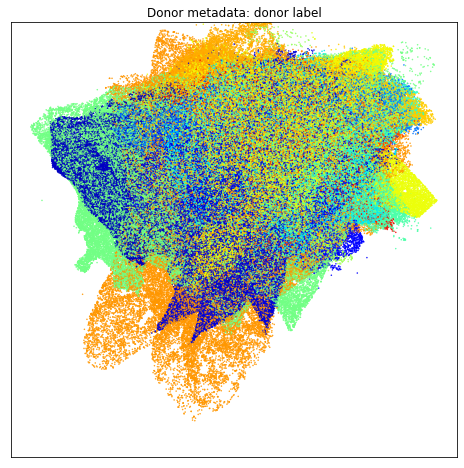

In [16]:
fig, ax = plot_sections( cell_extended['x'], cell_extended['y'], cc=cell_extended['donor_label_color'])
res = ax.set_title("Donor metadata: donor label")

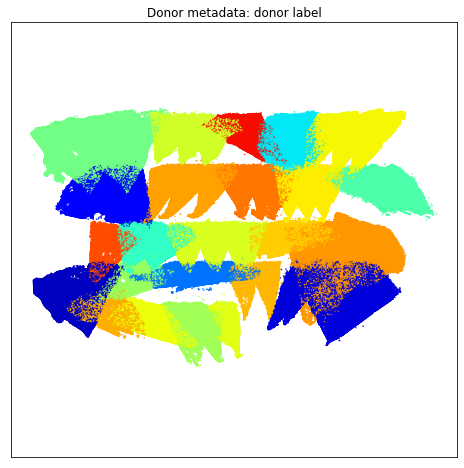

In [17]:
fig, ax = plot_sections( cell_extended['mosaic_x'], cell_extended['mosaic_y'], cc=cell_extended['donor_label_color'])
res = ax.set_title("Donor metadata: donor label")

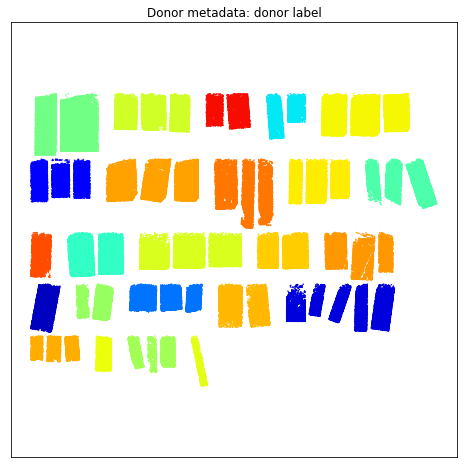

In [18]:
fig, ax = plot_sections( cell_selected['mosaic_x'], cell_selected['mosaic_y'], cc=cell_selected['donor_label_color'])
res = ax.set_title("Donor metadata: donor label")

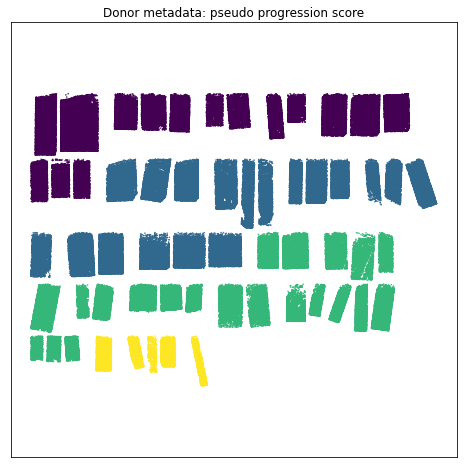

In [19]:
fig, ax = plot_sections( cell_selected['mosaic_x'], cell_selected['mosaic_y'], cc=cell_selected['pseudo_progression_score_range_color'])
res = ax.set_title("Donor metadata: pseudo progression score")

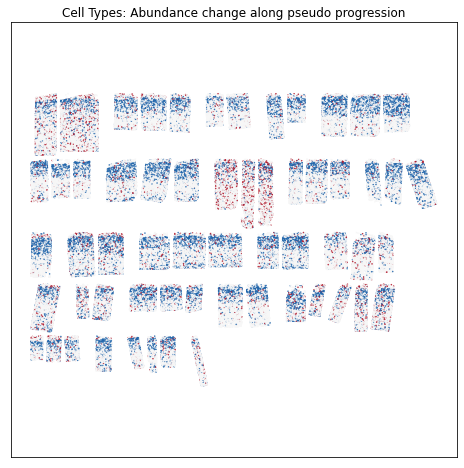

In [20]:
fig, ax = plot_sections( cell_selected['mosaic_x'], cell_selected['mosaic_y'], cc=cell_selected['abundancechangecps_color'])
res = ax.set_title("Cell Types: Abundance change along pseudo progression")

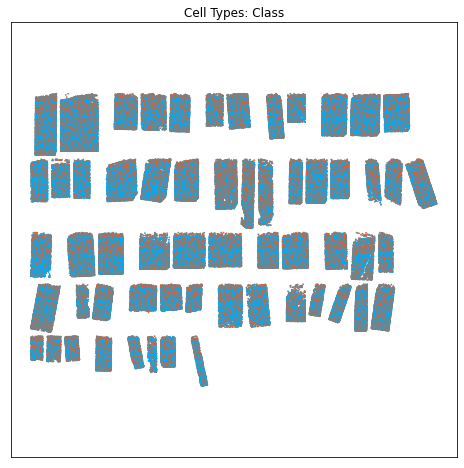

In [21]:
fig, ax = plot_sections( cell_selected['mosaic_x'], cell_selected['mosaic_y'], cc=cell_selected['class_color'],ssize=2)
res = ax.set_title("Cell Types: Class")

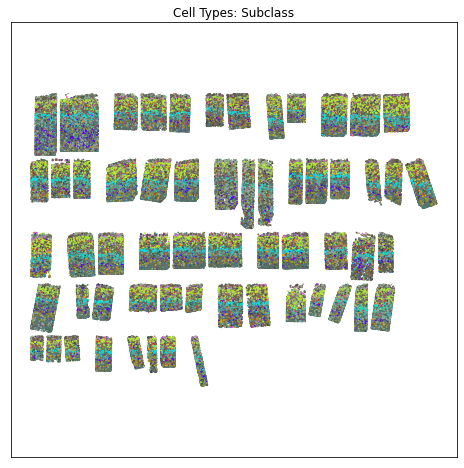

In [22]:
fig, ax = plot_sections( cell_selected['mosaic_x'], cell_selected['mosaic_y'], cc=cell_selected['subclass_color'],ssize=2)
res = ax.set_title("Cell Types: Subclass")

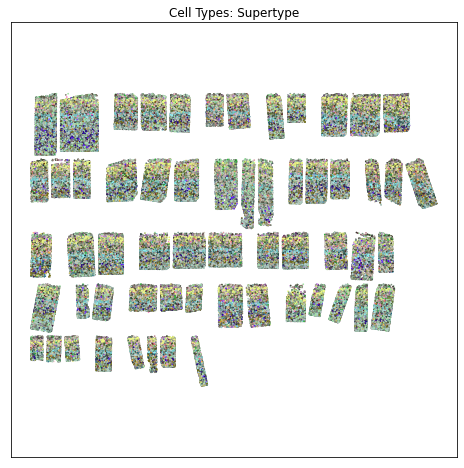

In [23]:
fig, ax = plot_sections( cell_selected['mosaic_x'], cell_selected['mosaic_y'], cc=cell_selected['supertype_color'],ssize=2)
res = ax.set_title("Cell Types: Supertype")

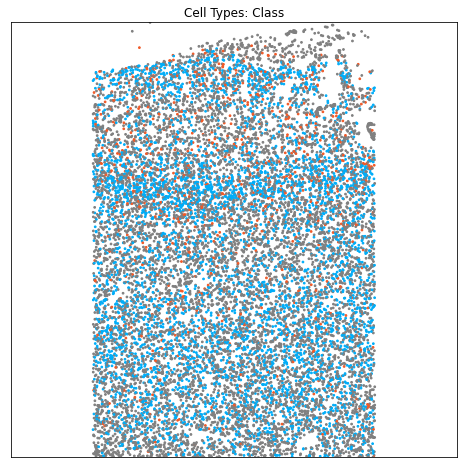

In [24]:
fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], cc=cell_one_section['class_color'],ssize=12)
res = ax.set_title("Cell Types: Class")

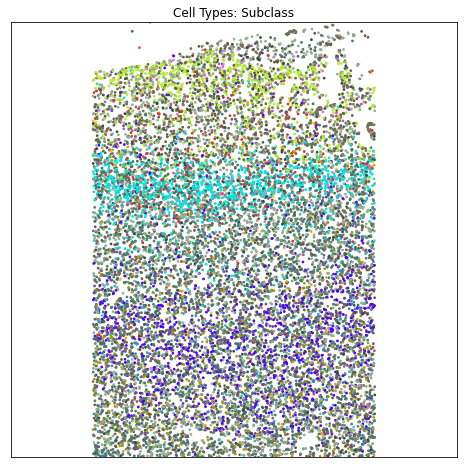

In [25]:
fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], cc=cell_one_section['subclass_color'],ssize=12)
res = ax.set_title("Cell Types: Subclass")

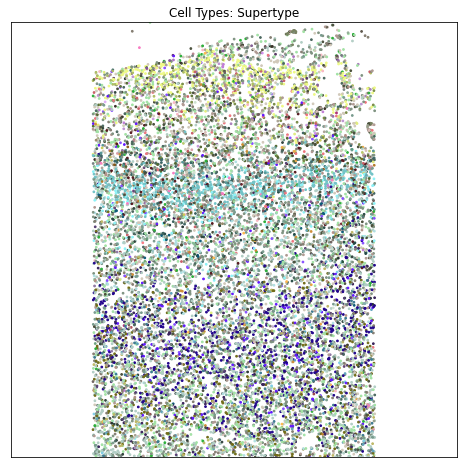

In [26]:
fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], cc=cell_one_section['supertype_color'],ssize=12)
res = ax.set_title("Cell Types: Supertype")

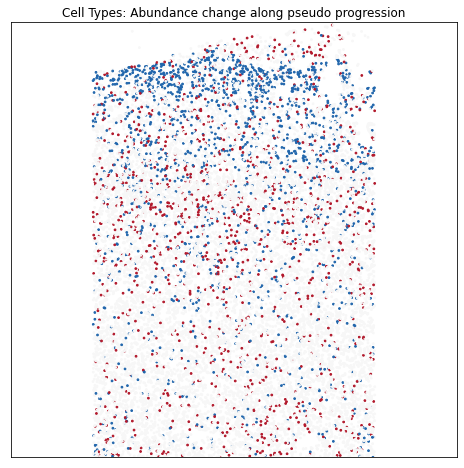

In [27]:
fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], cc=cell_one_section['abundancechangecps_color'],ssize=12)
res = ax.set_title("Cell Types: Abundance change along pseudo progression")

In [28]:
rpath = metadata['gene']['files']['csv']['relative_path']
file = os.path.join( download_base, rpath)
gene = pd.read_csv(file)
gene.set_index('gene_identifier',inplace=True)
print("Number of genes = ", len(gene))
gene.head(5)

Number of genes =  180


gene_symbol
gene_identifier            
ENSG00000198963        RORB
ENSG00000125869       LAMP5
ENSG00000134138       MEIS2
ENSG00000149571     KIRREL3
ENSG00000187323         DCC

In [29]:
pred = ['Blank' in x for x in gene['gene_symbol']]
print("Number of blanks = ", len(gene[pred]))

Number of blanks =  40


In [30]:
expression_path = '/allen/aibs/technology/danielsf/sea_ad/expression_matrices/SEAAD-MERFISH/20231030'
file = os.path.join( expression_path, 'SEAAD-MERFISH-MTG-log2.h5ad')

In [31]:
adata = anndata.read_h5ad(file,backed='r')
print(adata)

AnnData object with n_obs × n_vars = 1321191 × 180 backed at '/allen/aibs/technology/danielsf/sea_ad/expression_matrices/SEAAD-MERFISH/20231030/SEAAD-MERFISH-MTG-log2.h5ad'
    obs: 'brain_section_label', 'region_of_interest_acronym', 'donor_label'
    var: 'gene_symbol'


In [32]:
gnames = ['RORB','CUX2','THEMIS','LAMP5']
pred = [x in gnames for x in gene.gene_symbol]
gene_filtered = gene[pred]
gene_filtered

gene_symbol
gene_identifier            
ENSG00000198963        RORB
ENSG00000125869       LAMP5
ENSG00000111249        CUX2
ENSG00000172673      THEMIS

In [33]:
start = time.time()
exp = adata[:, gene_filtered.index].to_df()
exp.columns = gene_filtered.gene_symbol
print(" - time taken: ", time.time() - start)

 - time taken:  3.5834896564483643


In [34]:
cell_extended = cell_extended.join(exp)
cell_selected = cell_extended[selected]
cell_one_section = cell_extended[one_section]

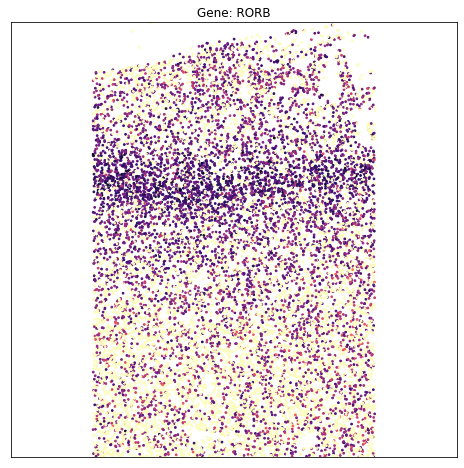

In [35]:
gene = 'RORB'
fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], val=cell_one_section[gene],ssize=12,cmap=plt.cm.magma_r)
res = ax.set_title("Gene: %s" % gene)

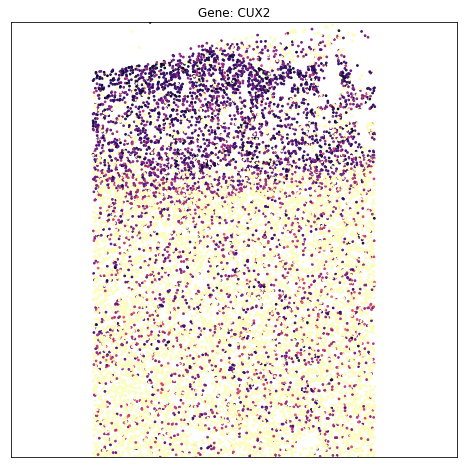

In [36]:
gene = 'CUX2'
fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], val=cell_one_section[gene],ssize=12,cmap=plt.cm.magma_r)
res = ax.set_title("Gene: %s" % gene)

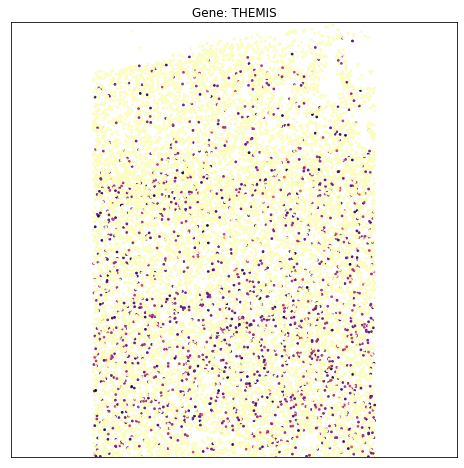

In [37]:
gene = 'THEMIS'
fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], val=cell_one_section[gene],ssize=12,cmap=plt.cm.magma_r)
res = ax.set_title("Gene: %s" % gene)

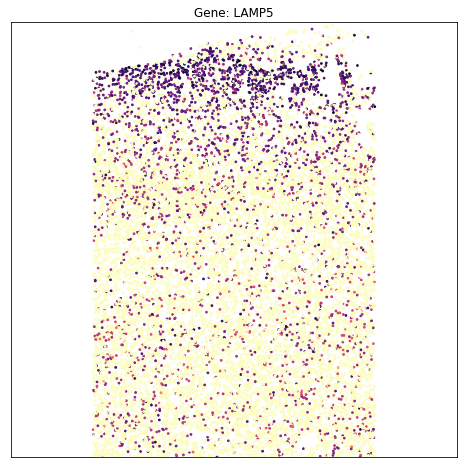

In [38]:
gene = 'LAMP5'
fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], val=cell_one_section[gene],ssize=12,cmap=plt.cm.magma_r)
res = ax.set_title("Gene: %s" % gene)

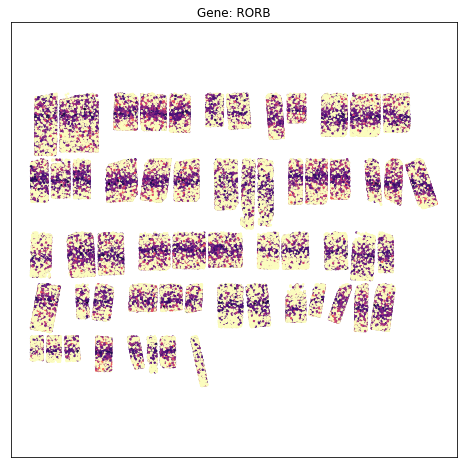

In [39]:
gene = 'RORB'
fig, ax = plot_sections( cell_selected['mosaic_x'], cell_selected['mosaic_y'], 
                        val=cell_selected[gene],ssize=8,cmap=plt.cm.magma_r)
res = ax.set_title("Gene: %s" % gene)

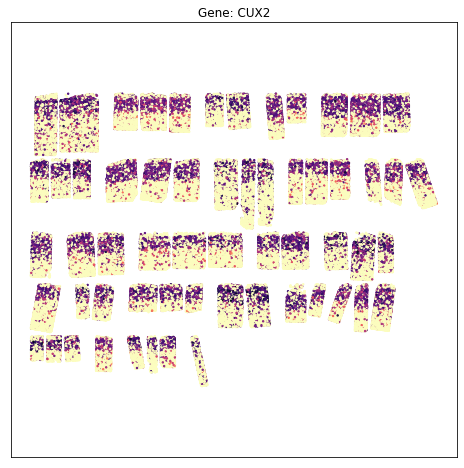

In [40]:
gene = 'CUX2'
fig, ax = plot_sections( cell_selected['mosaic_x'], cell_selected['mosaic_y'], 
                        val=cell_selected[gene],ssize=8,cmap=plt.cm.magma_r)
res = ax.set_title("Gene: %s" % gene)

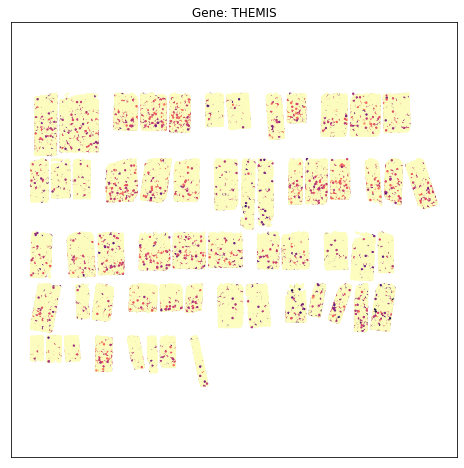

In [41]:
gene = 'THEMIS'
fig, ax = plot_sections( cell_selected['mosaic_x'], cell_selected['mosaic_y'], 
                        val=cell_selected[gene],ssize=8,cmap=plt.cm.magma_r)
res = ax.set_title("Gene: %s" % gene)

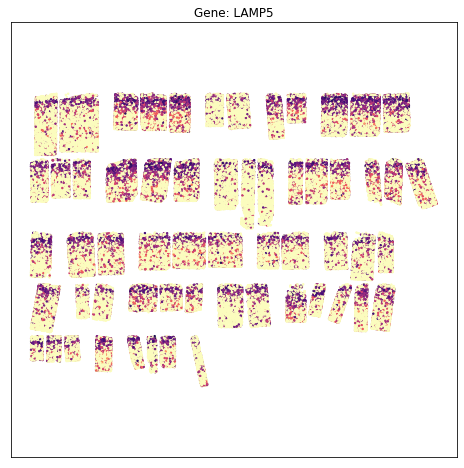

In [42]:
gene = 'LAMP5'
fig, ax = plot_sections( cell_selected['mosaic_x'], cell_selected['mosaic_y'], 
                        val=cell_selected[gene],ssize=8,cmap=plt.cm.magma_r)
res = ax.set_title("Gene: %s" % gene)

In [43]:
sections = cell_extended.groupby('brain_section_label')[['donor_label','pseudo_progression_score']].first()
sections = sections.sort_values('pseudo_progression_score')
sections

donor_label  pseudo_progression_score
brain_section_label                                                        
H20.33.001.CX28.MTG.02.007.1.02.02     H21.33.001                  0.149616
H20.33.001.CX28.MTG.02.007.1.02.03     H21.33.001                  0.149616
H21.33.011.Cx26.MTG.02.007.3.01.06     H21.33.011                  0.170619
H21.33.011.Cx26.MTG.02.007.3.01.05     H21.33.011                  0.170619
H21.33.011.Cx26.MTG.02.007.3.01.04     H21.33.011                  0.170619
H21.33.038.Cx20.MTG.02.007.3.01.02     H21.33.038                  0.182370
H21.33.038.Cx20.MTG.02.007.3.01.04     H21.33.038                  0.182370
H20.33.035.Cx26.MTG.02.007.1.01.03     H20.33.035                  0.204485
H20.33.035.Cx26.MTG.02.007.1.01.04     H20.33.035                  0.204485
H21.33.015.Cx26.MTG.02.007.1.2         H21.33.015                  0.230781
H21.33.015.Cx26.MTG.02.007.1.1         H21.33.015                  0.230781
H21.33.015.Cx26.MTG.02.007.1.0         H21.33.015                  0.230781
H20.33.012.Cx24.MTG.02.007.1.01.01     H20.33.012                  0.237010
H20.33.012.Cx24.MTG.02.007.1.03.02     H20.33.012                  0.237010
H20.33.012.Cx24.MTG.02.007.1.03.03     H20.33.012                  0.237010
H21.33.023.Cx26.MTG.02.007.1.03.01     H21.33.023                  0.296555
H21.33.023.Cx26.MTG.02.007.1.03.05     H21.33.023                  0.296555
H21.33.023.Cx26.MTG.02.007.1.03.04     H21.33.023                  0.296555
H21.33.028.Cx28.MTG.02.007.1.02.02     H21.33.028                  0.300177
H21.33.028.Cx28.MTG.02.007.1.02.04     H21.33.028                  0.300177
H21.33.028.CX28.MTG.02.007.1.01.01     H21.33.028                  0.300177
H21.33.016.Cx26.MTG.02.007.3.01.03     H21.33.016                  0.336173
H21.33.016.Cx26.MTG.02.007.3.01.02     H21.33.016                  0.336173
H21.33.016.Cx26.MTG.02.007.3.01.01     H21.33.016                  0.336173
H20.33.044.Cx26.MTG.02.007.1.01.03     H20.33.044                  0.355632
H20.33.044.Cx26.MTG.02.007.1.01.02     H20.33.044                  0.355632
H20.33.044.Cx26.MTG.02.007.1.01.04     H20.33.044                  0.355632
H21.33.032.CX24.MTG.02.007.1.01.04     H21.33.032                  0.380411
H20.33.040.Cx25.MTG.02.007.1.01.03     H20.33.040                  0.438827
H20.33.040.Cx25.MTG.02.007.1.01.04     H20.33.040                  0.438827
H21.33.012.Cx26.MTG.02.007.1.01.06     H21.33.012                  0.486297
H21.33.012.Cx26.MTG.02.007.1.01.04     H21.33.012                  0.486297
H21.33.012.Cx26.MTG.02.007.1.01.05     H21.33.012                  0.486297
H21.33.019.Cx30.MTG.02.007.5.01.01     H21.33.019                  0.517476
H21.33.019.Cx30.MTG.02.007.5.01.02     H21.33.019                  0.517476
H21.33.025.CX26.MTG.02.007.4.01.02     H21.33.025                  0.518005
H21.33.025.CX26.MTG.02.007.4.01.04     H21.33.025                  0.518005
H21.33.025.CX26.MTG.02.007.4.01.06     H21.33.025                  0.518005
H20.33.001.Cx28.MTG.02.007.1.01.03     H20.33.001                  0.522889
H21.33.005.Cx18.MTG.02.007.02.04       H21.33.005                  0.575735
H21.33.005.Cx18.MTG.02.007.02.03       H21.33.005                  0.575735
H20.33.025.Cx28.MTG.02.007.1.01.06     H20.33.025                  0.588882
H20.33.025.Cx28.MTG.02.007.1.01.04     H20.33.025                  0.588882
H20.33.025.Cx28.MTG.02.007.1.01.02     H20.33.025                  0.588882
H21.33.021.Cx26.MTG.02.007.1.04        H21.33.021                  0.704997
H21.33.021.Cx26.MTG.02.007.1.06        H21.33.021                  0.704997
H20.33.004.Cx26.MTG.02.007.1.02.04     H20.33.004                  0.725006
H20.33.004.Cx26.MTG.02.007.1.02.03     H20.33.004                  0.725006
H20.33.004.Cx26.MTG.02.007.1.01.04     H20.33.004                  0.725006
H20.33.004.Cx26.MTG.02.007.1.01.05     H20.33.004                  0.725006
H20.33.004.Cx26.MTG.02.007.1.02.02     H20.33.004                  0.725006
H21.33.022

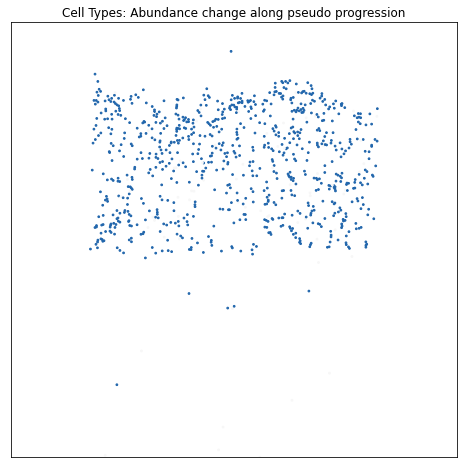

In [44]:
brain_section_label = 'H21.33.011.Cx26.MTG.02.007.3.01.04'
pred = selected
pred = np.logical_and( pred, cell_extended['brain_section_label'] == brain_section_label )
pred = np.logical_and( pred, cell_extended['subclass'] == 'L2/3 IT')
cell_one_section = cell_extended[pred]

fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], cc=cell_one_section['abundancechangecps_color'],ssize=12)
res = ax.set_title("Cell Types: Abundance change along pseudo progression")

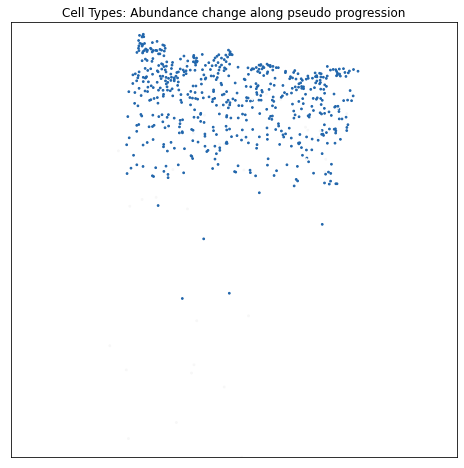

In [45]:
brain_section_label = 'H20.33.001.Cx28.MTG.02.007.1.01.03'
pred = selected
pred = np.logical_and( pred, cell_extended['brain_section_label'] == brain_section_label )
pred = np.logical_and( pred, cell_extended['subclass'] == 'L2/3 IT')
cell_one_section = cell_extended[pred]

fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], cc=cell_one_section['abundancechangecps_color'],ssize=12)
res = ax.set_title("Cell Types: Abundance change along pseudo progression")

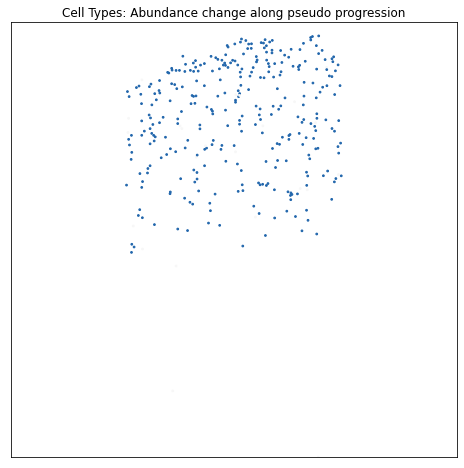

In [46]:
brain_section_label = 'H21.33.006.Cx28.MTG.02.007.1.01.09.04'
pred = selected
pred = np.logical_and( pred, cell_extended['brain_section_label'] == brain_section_label )
pred = np.logical_and( pred, cell_extended['subclass'] == 'L2/3 IT')
cell_one_section = cell_extended[pred]

fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], cc=cell_one_section['abundancechangecps_color'],ssize=12)
res = ax.set_title("Cell Types: Abundance change along pseudo progression")

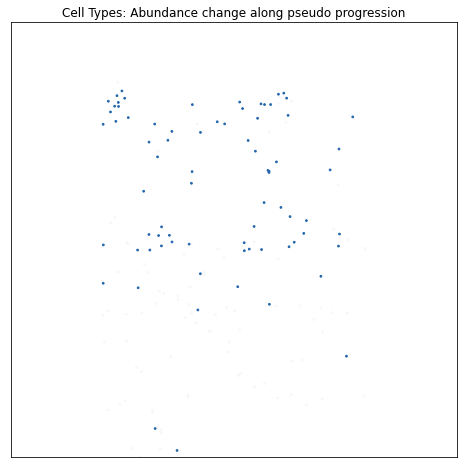

In [47]:
brain_section_label = 'H21.33.011.Cx26.MTG.02.007.3.01.04'
pred = selected
pred = np.logical_and( pred, cell_extended['brain_section_label'] == brain_section_label )
pred = np.logical_and( pred, cell_extended['subclass'] == 'Sst')
cell_one_section = cell_extended[pred]

fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], cc=cell_one_section['abundancechangecps_color'],ssize=12)
res = ax.set_title("Cell Types: Abundance change along pseudo progression")

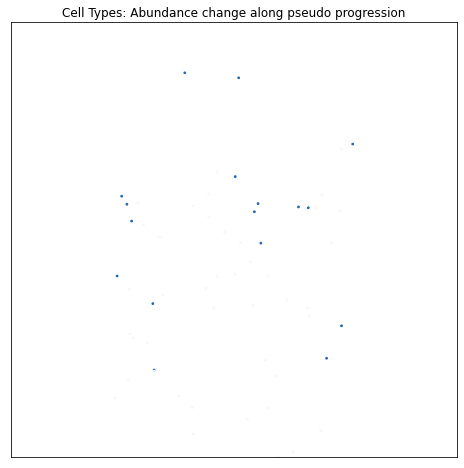

In [48]:
brain_section_label = 'H20.33.001.Cx28.MTG.02.007.1.01.03'
pred = selected
pred = np.logical_and( pred, cell_extended['brain_section_label'] == brain_section_label )
pred = np.logical_and( pred, cell_extended['subclass'] == 'Sst')
cell_one_section = cell_extended[pred]

fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], cc=cell_one_section['abundancechangecps_color'],ssize=12)
res = ax.set_title("Cell Types: Abundance change along pseudo progression")

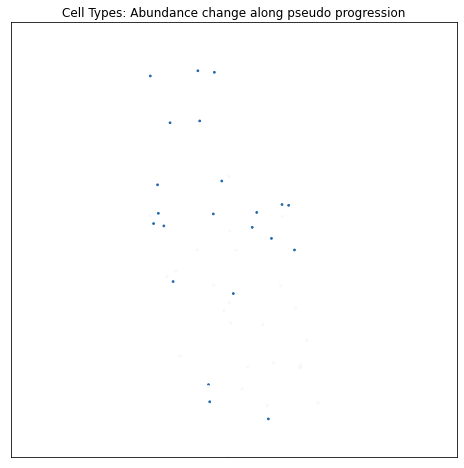

In [49]:
brain_section_label = 'H21.33.006.Cx28.MTG.02.007.1.01.09.02'
pred = selected
pred = np.logical_and( pred, cell_extended['brain_section_label'] == brain_section_label )
pred = np.logical_and( pred, cell_extended['subclass'] == 'Sst')
cell_one_section = cell_extended[pred]

fig, ax = plot_sections( cell_one_section['x'], cell_one_section['y'], cc=cell_one_section['abundancechangecps_color'],ssize=12)
res = ax.set_title("Cell Types: Abundance change along pseudo progression")